In [23]:
from sklearn import model_selection, linear_model, metrics, pipeline, preprocessing

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\maaga\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [25]:
raw_data = pd.read_csv('bike_sharing_demand.csv')
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


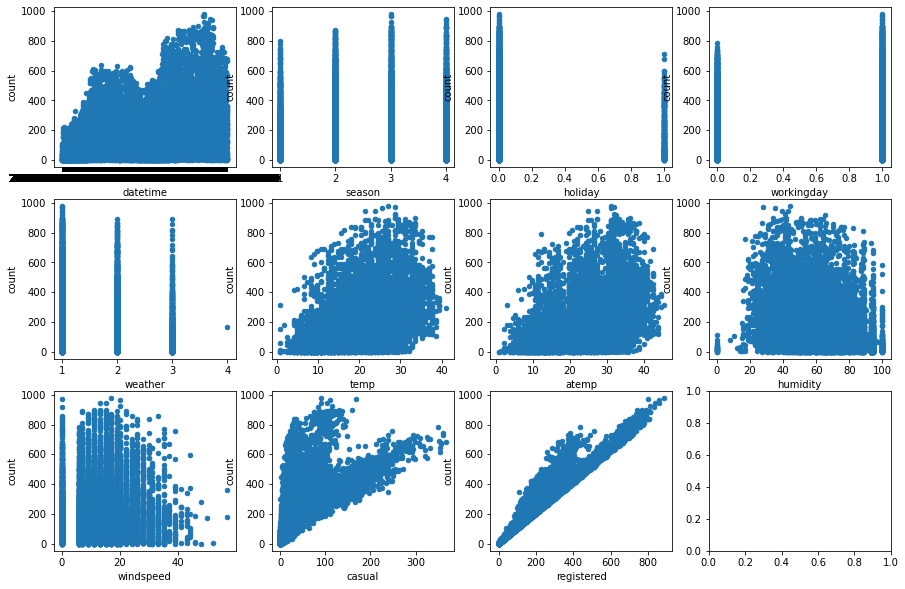

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(raw_data.columns[:-1]):
    raw_data.plot(feature, "count", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

In [27]:
raw_data.datetime = raw_data.datetime.apply(pd.to_datetime)

In [28]:
raw_data['month'] = raw_data.datetime.apply(lambda x : x.month)
raw_data['hour'] = raw_data.datetime.apply(lambda x : x.hour)

In [29]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


In [35]:
data = raw_data[['season', 'month', 'hour', 'holiday', 'weather', 'atemp', 'windspeed', 'count']]

In [36]:
data.head()

,season,month,hour,holiday,weather,atemp,windspeed,count
0,1,1,0,0,1,14.395,0.0,16
1,1,1,1,0,1,13.635,0.0,40
2,1,1,2,0,1,13.635,0.0,32
3,1,1,3,0,1,14.395,0.0,13
4,1,1,4,0,1,14.395,0.0,1


In [37]:
train_data = data.iloc[:-2000]
test_data = data.iloc[-2000:]

In [38]:
print(raw_data.shape, train_data.shape, test_data.shape)

(10886, 14) (8886, 8) (2000, 8)


In [66]:
#обучение
train_labels = train_data['count'].values
train_data = train_data.drop(['count'], axis = 1)

In [68]:
#тест
test_labels = test_data['count'].values
test_data = test_data.drop(['count'], axis = 1)

### SGDRegressor

In [69]:
regressor = linear_model.SGDRegressor(random_state = 0, max_iter=5)
regressor.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 5,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [70]:
regressor.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(test_data))

C:\Users\maaga\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


589904189.090789

In [71]:
regressor.predict(test_data)[:10]

array([4.83137858e+08, 4.71671353e+08, 3.88257728e+08, 5.17150885e+08,
       5.46591444e+08, 4.15173421e+08, 5.54559698e+08, 6.14810742e+08,
       4.69685368e+08, 5.28241435e+07])

### RandomForest

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
RFregressor = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 50)

In [74]:
RFregressor.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, RFregressor.predict(test_data))

108.25260820075594

In [75]:
RFregressor.predict(test_data)[:10]

array([277.71070845, 354.16733333, 458.7352381 , 458.89222222,
       361.23      , 277.01833333, 216.27066667, 157.598     ,
       143.72      ,  51.78      ])

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
DTregressor = DecisionTreeClassifier(random_state=0, max_depth=2)

In [84]:
DTregressor.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, DTregressor.predict(test_data))

176.306

In [85]:
DTregressor.predict(test_data)[:10]

array([165, 165, 165, 165, 165, 165, 165, 165, 165,  14], dtype=int64)

Text(0.5, 1.0, 'random forest model')

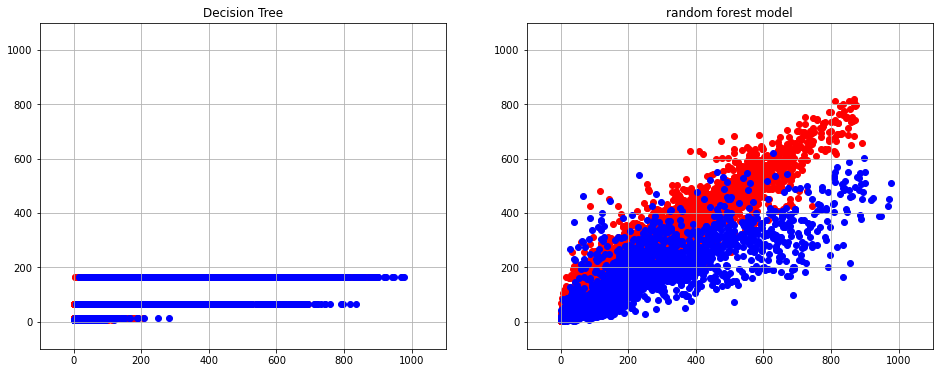

In [86]:
pylab.figure(figsize=(16, 6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
pylab.scatter(train_labels, DTregressor.predict(train_data), color = 'red')
pylab.scatter(test_labels, DTregressor.predict(test_data), color = 'blue')
pylab.title('Decision Tree')


pylab.subplot(1,2,2)
pylab.grid(True)
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
pylab.scatter(train_labels, RFregressor.predict(train_data), color = 'red')
pylab.scatter(test_labels, RFregressor.predict(test_data), color = 'blue')
pylab.title('random forest model')
